In [1]:
import scipy.io as sio
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
data = sio.loadmat('heightWeight.mat')
hwdata = data['heightWeightData']
y = hwdata[:,0]
x = hwdata[:,1:]
maleNdx = np.where(y==1)
femaleNdx = np.where(y==2)

### Gaussian Models
The probability density function for an Multivariate Normal in D dimensions is defined as follows,
$$\mathcal{N}(\mathbf{x}|\mathbf{\mu},\mathbf{\Sigma})\triangleq \frac{1}{(2\pi)^{\frac{D}{2}}|\mathbf{\Sigma}|^{\frac{1}{2}}}\exp\bigg[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^\top\mathbf{\Sigma}^{-1}(\mathbf{x}-\mathbf{\mu})\bigg]$$

The expression inside the exponent is the **Mahalanobis distance** between a data vector $\mathbf{x}$ and the mean vector $\mathbf{\mu}$. To gain a better understanding of this quantity by performing an **eigendecomposition** of $\mathbf{\Sigma}=\mathbf{U\Lambda U^\top}$, where $\mathbf{U}$ is an orthonormal matrix of eigenvectors satisfying $\mathbf{U^\top U=I}$, and $\mathbf{\Lambda}$ is a diagonal matrix of eigenvalues. That is, 

$$\mathbf{\Sigma}^{-1}=\mathbf{U^{-\top}\Lambda^{-1}U^{-1}}=\mathbf{U\Sigma^{-1}U^\top}=\sum^D_{i=1}\frac{1}{\lambda_i}\mathbf{u_iu_i^\top}$$
where $\mathbf{u_i}$ is the $i^{th}$ column of $\mathbf{U}$, containing the $i^{th}$ eigenvector. Hence, the Mahalanobis distance can be rewritten as,

\begin{align}
(\mathbf{x}-\mathbf{\mu})^\top\mathbf{\Sigma}^{-1}(\mathbf{x}-\mathbf{\mu})&= (\mathbf{x}-\mathbf{\mu})^\top\sum^D_{i=1}\frac{1}{\lambda_i}\mathbf{u_iu_i^\top}(\mathbf{x}-\mathbf{\mu}) \\
&= \sum^D_{i=1}\frac{1}{\lambda}(\mathbf{x}-\mathbf{\mu})^\top \mathbf{u_i}\mathbf{u_i}^\top(\mathbf{x}-\mathbf{\mu}) = \sum^D_{i=1}\frac{y_i^2}{\lambda_i}
\end{align}
where $y_i\triangleq \mathbf{u_i}^\top(\mathbf{x}-\mathbf{\mu})$. This matches the elliptical equation in 2d, 

$$\frac{y_1^2}{\lambda_1}+\frac{y_2^2}{\lambda_2}=1$$



#### MLE for an MVN
The parameters are given by,
\begin{align}
\mathbf{\mu} &= \frac{1}{N}\sum^N_{i=1}\mathbf{x}_i \triangleq \bar{\mathbf{x}} \\
\mathbf{\Sigma} &= \frac{1}{N}\sum^N_{i=1}(\mathbf{x}_i-\bar{\mathbf{x}})(\mathbf{x}_i-\bar{\mathbf{x}})^\top = \frac{1}{N}\sum^N_{i=1}\mathbf{x_i}\mathbf{x_i}^\top - \bar{\mathbf{x}}\bar{\mathbf{x}}^\top
\end{align}

In [2]:
mx = x[maleNdx,:]
mm = np.mean(mx,axis=1); mv = np.cov(np.transpose(mx.squeeze()))
fx = x[femaleNdx,:]
fm = np.mean(fx,axis=1); fv = np.cov(fx.squeeze().T)

In [3]:
def gaussPlot2d(mu,Sigma):
    n = 100; mu = mu.T; k = np.sqrt(6)
    d,u = np.linalg.eig(Sigma)
    t = np.linspace(0,2*math.pi,n)
    xy = np.vstack((np.cos(t),np.sin(t))) 
    w = np.matmul((k*np.matmul(u,np.sqrt(np.diag(d)))),xy)
    z = np.tile(mu,(1,n))+w
    plt.plot(z[0,:],z[1,:])

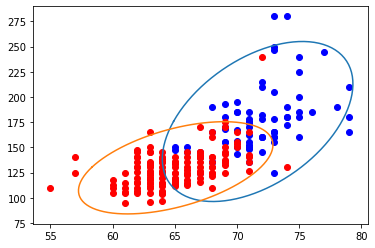

In [4]:
plt.scatter(x[maleNdx,0],x[maleNdx,1],c='b')
gaussPlot2d(mm,mv)
plt.scatter(x[femaleNdx,0],x[femaleNdx,1],c='r')
gaussPlot2d(fm,fv)

### Proof
The log-likelihood is 